In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("eng_tur_combined.csv")

In [4]:
df.drop("Timestamp", axis=1, inplace=True)

In [5]:
df.rename(columns={'Since how many years have you been sharing a common place with the people foreign to your own culture or nationality? (If you have been surrounded with them your whole life, you can simply enter your age): ': 'yearSpentWithForeign', 'Are you among the majority or the minority with respect to ethnicity, culture, or religion of the population who you share a common place with?': 'major/minor', 'Do you speak your mother tongue with your family members? ': 'mTongueFamily'}, inplace=True)
df.rename(columns={'With people outside of your family members, who also share the same mother tongue with you, how often do you speak in your mother tongue with them?': 'mTongueOut', 'Aside from your own family members (mother, father, siblings),  how much amount of people, who you spend time with the most, are foreign to your own culture, religion, or nationality? ':'spentTimeWithForeignPeople'}, inplace=True)
df.rename(columns={'How often do you practice your own culture? ': 'howOftnPractUrCulture', 'How often without any form of pressure are you able to practice your own religious beliefs or disbelief?':'practBeliefFreely', 'Do you ever feel like the person living your life is not you? ': 'LivinNotU'}, inplace=True)
df.rename(columns={'When compared to people of your age, how successful are you in regards to your career or academic studies? Note: the emotional satisfaction you gain should not be considered for this question.':'careerSuccess', 'How strong is your emotional bond with yourself and people who you consider close to yourself? These can include both relatives and friends.':'emotionalSuccess'}, inplace=True)
df.rename(columns={'If your friend invites you to an event that is related to their culture or religion, which is not the same as yours, would you like to go?': 'goToForeignEvent', 'Do you sometimes find yourself enjoying your time with someone that is not from your culture or religion?':'enjoyTimeForeignPeople'}, inplace=True)

In [6]:
df.drop(labels=[7], axis=0, inplace=True)
# converting yearSpentWithForeign to int data type
df["yearSpentWithForeign"] = df["yearSpentWithForeign"].astype(str).astype(int);

In [7]:
object_cols = [col for col in df if df[col].dtype == "object"]
print(object_cols);

['major/minor', 'mTongueFamily', 'mTongueOut', 'spentTimeWithForeignPeople', 'howOftnPractUrCulture', 'practBeliefFreely', 'LivinNotU', 'careerSuccess', 'emotionalSuccess', 'goToForeignEvent', 'enjoyTimeForeignPeople']


In [8]:
# Apply one-hot encoder to majority/minority column categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
columnsToBeTransferred = ['major/minor', 'mTongueFamily', 'goToForeignEvent', 'enjoyTimeForeignPeople']
one_hot_columns = pd.DataFrame(OH_encoder.fit_transform(df[columnsToBeTransferred]))

# One-hot encoding removed index; put it back
one_hot_columns.index = df.index

# Remove the columns which will be one_hoted (will replace with one-hot encoding)
otherFeatures_df = df.drop(columnsToBeTransferred, axis=1)

# Add one-hot encoded columns to numerical features
df = pd.concat([otherFeatures_df, one_hot_columns], axis=1)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

columns_to_be_converted_to_ordinal = ['mTongueOut','spentTimeWithForeignPeople','howOftnPractUrCulture','practBeliefFreely','LivinNotU','careerSuccess','emotionalSuccess']
# Make copy to avoid changing original data 
df_to_be_modified = df.copy()


ordinal_encoder = OrdinalEncoder()
df[columns_to_be_converted_to_ordinal] = ordinal_encoder.fit_transform(df[columns_to_be_converted_to_ordinal])

In [10]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))
df['cluster']=labels

In [11]:
sil

[0.5396593066289139,
 0.4538767319889764,
 0.5058159701885957,
 0.5335229161832837,
 0.4104654157223324,
 0.4066490068800156,
 0.3930541485384025,
 0.3321288709702125,
 0.2459464242936785]

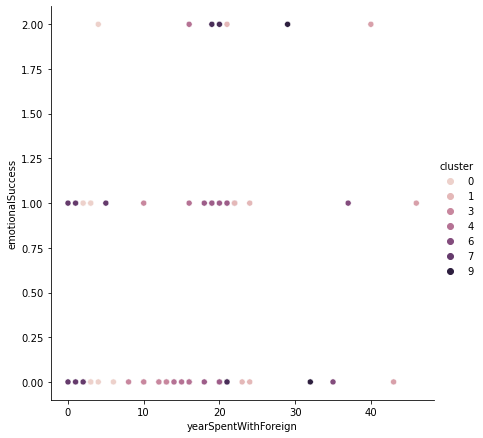

In [116]:
sns.relplot(
    x=df["yearSpentWithForeign"], y=df["emotionalSuccess"], hue=df["cluster"], data=df, height=6, color=''
);

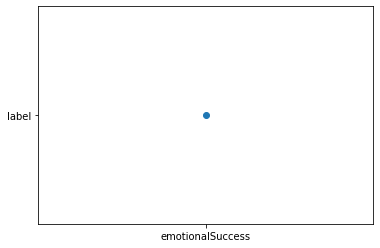